<h1>Decision Tree and Random Florest (Classification)</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


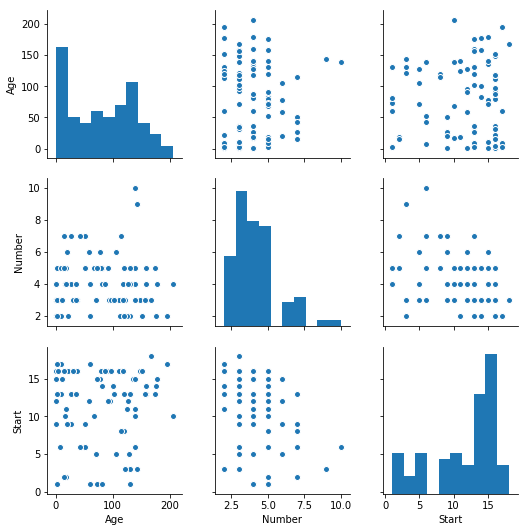

In [4]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[19  2]
 [ 3  1]]


             precision    recall  f1-score   support

     absent       0.86      0.90      0.88        21
    present       0.33      0.25      0.29         4

avg / total       0.78      0.80      0.79        25



In [19]:
from sklearn.ensemble import RandomForestClassifier

rftree = RandomForestClassifier(n_estimators=200)
rftree.fit(X_train, y_train)
rft_predictions = rftree.predict(X_test)

In [20]:
print(confusion_matrix(y_test, rft_predictions))
print('\n')
print(classification_report(y_test, rft_predictions))

[[21  0]
 [ 4  0]]


             precision    recall  f1-score   support

     absent       0.84      1.00      0.91        21
    present       0.00      0.00      0.00         4

avg / total       0.71      0.84      0.77        25



/home/jessica/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


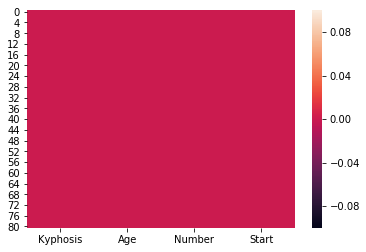

In [21]:
sns.heatmap(df.isnull())

absent     64
present    17
Name: Kyphosis, dtype: int64

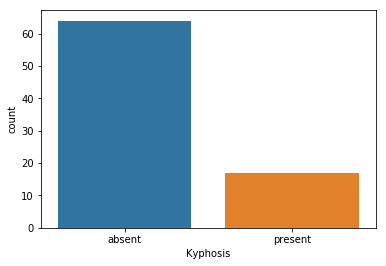

In [23]:
sns.countplot(df['Kyphosis'])
df.Kyphosis.value_counts()